FOCUS OF ANALYSIS

What were the top Australian news topics over the last decade? ii) what can these say about the national conversation?

DESCRIPTION

Knowing and analysing the top australian new headlines over the period of 2010 to 2019, would be helpful in understanding the hot news topics which dominated the national conversation over a certain period. Stakeholders including government and any business sectors can utilise this analysis to understand how other business competitors dominated the national conversation at a particular time. Other news channels may also be interested in this analysis.
Different business sectors to understand, what is important to australians at different times, What are the news, which created awareness among people (national conversation).

DATA SOURCES

The dataset used in this analysis is the one which was derived from kaggle containing ABC national news headlines from the year 2003 to 2019. (https://www.kaggle.com/therohk/million-headlines)

In [1]:
#import libraries
import pandas as pd    # used for data manipulation and data analysis
import numpy as np
import re              #used for regular expression
import seaborn as sns
import matplotlib.pyplot as plt    # used for visualisation
import sys
!{sys.executable} -m pip install nltk
from nltk.corpus import stopwords  # used for stopwords removal 


#Code to load data
file_path = "abcnews-date-text.csv"
data3 = pd.read_csv(file_path,parse_dates=[0],infer_datetime_format=True)

data3['publish_date'] = pd.to_datetime(data3.publish_date)
data3['Year'] = data3.publish_date.dt.year

In [2]:
#Viewing dataset
data3

,publish_date,headline_text,Year
0,2003-02-19,aba decides against community broadcasting lic...,2003
1,2003-02-19,act fire witnesses must be aware of defamation,2003
2,2003-02-19,a g calls for infrastructure protection summit,2003
3,2003-02-19,air nz staff in aust strike for pay rise,2003
4,2003-02-19,air nz strike to affect australian travellers,2003
...,...,...,...
1186013,2019-12-31,vision of flames approaching corryong in victoria,2019
1186014,2019-12-31,wa police and government backflip on drug amne...,2019
1186015,2019-12-31,we have fears for their safety: victorian premier,2019
1186016,2019-12-31,when do the 20s start,2019


ANALYSIS 

In [3]:
#Knowing data 
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 3 columns):
publish_date     1186018 non-null datetime64[ns]
headline_text    1186018 non-null object
Year             1186018 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.1+ MB


In [4]:
#Trimming data to last decade
reduced_data = data3[510305:]                   
reduced_data.head()

,publish_date,headline_text,Year
510305,2010-01-01,12m degas stolen from museum,2010
510306,2010-01-01,17 die in bangladesh bus crash,2010
510307,2010-01-01,2010 to be drier after very wet 2009,2010
510308,2010-01-01,37 catholic workers killed worldwide,2010
510309,2010-01-01,600 hurt in philippine new year revelry,2010


In [5]:
#Tokenization
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens
reduced_data['headline_text'] = reduced_data.headline_text.apply(lambda x: tokenize(x.lower()))
reduced_data.head()

C:\Users\abina\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,publish_date,headline_text,Year
510305,2010-01-01,"[12m, degas, stolen, from, museum]",2010
510306,2010-01-01,"[17, die, in, bangladesh, bus, crash]",2010
510307,2010-01-01,"[2010, to, be, drier, after, very, wet, 2009]",2010
510308,2010-01-01,"[37, catholic, workers, killed, worldwide]",2010
510309,2010-01-01,"[600, hurt, in, philippine, new, year, revelry]",2010


In [6]:
#stopwords
stopwords = stopwords.words('english')

def remove_stopwords(text_tokenized):
    sw_removed_headline_text = [word for word in text_tokenized if word not in stopwords]
    return sw_removed_headline_text
reduced_data['stopword_removed_headline_text']= reduced_data['headline_text'].apply(lambda x:remove_stopwords(x))
reduced_data.head()

C:\Users\abina\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,publish_date,headline_text,Year,stopword_removed_headline_text
510305,2010-01-01,"[12m, degas, stolen, from, museum]",2010,"[12m, degas, stolen, museum]"
510306,2010-01-01,"[17, die, in, bangladesh, bus, crash]",2010,"[17, die, bangladesh, bus, crash]"
510307,2010-01-01,"[2010, to, be, drier, after, very, wet, 2009]",2010,"[2010, drier, wet, 2009]"
510308,2010-01-01,"[37, catholic, workers, killed, worldwide]",2010,"[37, catholic, workers, killed, worldwide]"
510309,2010-01-01,"[600, hurt, in, philippine, new, year, revelry]",2010,"[600, hurt, philippine, new, year, revelry]"


In [7]:
#Identifying the most common words (top 20) last decade
headline_list = reduced_data['stopword_removed_headline_text']
headline_list.values.tolist()
headline_list.head()

from itertools import chain
headline_list = list(chain.from_iterable(headline_list))

from collections import Counter
count = Counter(headline_list).most_common(20)
character = []
char_values = []
for x in count:
    character.append(x[0])
    char_values.append(x[1])
mapping = pd.DataFrame(character,columns =['Character'])
mapping["char_count"] = char_values
mapping

,Character,char_count
0,police,18531
1,new,17915
2,man,17112
3,says,13682
4,interview,12435
5,australia,11188
6,australian,9799
7,court,9635
8,nsw,9263
9,us,8428


In [8]:
#Identifying most common words in the news headline for the year 2019
year2019_news = reduced_data.loc[reduced_data['Year'] == 2019]     

year2019_list = year2019_news['stopword_removed_headline_text']
year2019_list.values.tolist()
year2019_list.head()

from itertools import chain
year2019_list = list(chain.from_iterable(year2019_list))

from collections import Counter
year2019_count = Counter(year2019_list).most_common(10)
character = []
char_values = []
for x in year2019_count:
    character.append(x[0])
    char_values.append(x[1])
year2019mapping = pd.DataFrame(character,columns =['Character'])
year2019mapping["char_count"] = char_values
year2019mapping

,Character,char_count
0,police,1043
1,australia,953
2,man,835
3,new,823
4,australian,782
5,election,713
6,trump,710
7,says,709
8,us,678
9,sydney,651


In [9]:
#Identifying most common words in the news headline for the year 2018
year2018_news = reduced_data.loc[reduced_data['Year'] == 2018]

year2018_list = year2018_news['stopword_removed_headline_text']
year2018_list.values.tolist()
year2018_list.head()

from itertools import chain
year2018_list = list(chain.from_iterable(year2018_list))

from collections import Counter
year2018_count = Counter(year2018_list).most_common(10)
character = []
char_values = []
for x in year2018_count:
    character.append(x[0])
    char_values.append(x[1])
year2018mapping = pd.DataFrame(character,columns =['Character'])
year2018mapping["char_count"] = char_values
year2018mapping

,Character,char_count
0,says,1142
1,trump,1099
2,police,1083
3,australia,1043
4,new,992
5,australian,968
6,man,862
7,us,813
8,world,631
9,sydney,624


In [10]:
#Identifying most common words in the news headline for the year 2017
year2017_news = reduced_data.loc[reduced_data['Year'] == 2017]

year2017_list = year2017_news['stopword_removed_headline_text']
year2017_list.values.tolist()
year2017_list.head()

from itertools import chain
year2017_list = list(chain.from_iterable(year2017_list))

from collections import Counter
year2017_count = Counter(year2017_list).most_common(10)
character = []
char_values = []
for x in year2017_count:
    character.append(x[0])
    char_values.append(x[1])
year2017mapping = pd.DataFrame(character,columns =['Character'])
year2017mapping["char_count"] = char_values
year2017mapping

,Character,char_count
0,says,1432
1,new,1366
2,trump,1359
3,australia,1304
4,police,1206
5,australian,988
6,wa,978
7,man,961
8,us,851
9,nsw,760


In [11]:
#Identifying most common words in the news headline for the year 2016
year2016_news = reduced_data.loc[reduced_data['Year'] == 2016]

year2016_list = year2016_news['stopword_removed_headline_text']
year2016_list.values.tolist()
year2016_list.head()

from itertools import chain
year2016_list = list(chain.from_iterable(year2016_list))

from collections import Counter
year2016_count = Counter(year2016_list).most_common(10)
character = []
char_values = []
for x in year2016_count:
    character.append(x[0])
    char_values.append(x[1])
year2016mapping = pd.DataFrame(character,columns =['Character'])
year2016mapping["char_count"] = char_values
year2016mapping

,Character,char_count
0,new,1824
1,man,1816
2,says,1724
3,police,1690
4,australia,1464
5,australian,1260
6,wa,1200
7,2016,1189
8,election,1090
9,nsw,1066


In [12]:
#Identifying most common words in the news headline for the year 2015
year2015_news = reduced_data.loc[reduced_data['Year'] == 2015]

year2015_list = year2015_news['stopword_removed_headline_text']
year2015_list.values.tolist()
year2015_list.head()

from itertools import chain
year2015_list = list(chain.from_iterable(year2015_list))

from collections import Counter
year2015_count = Counter(year2015_list).most_common(10)
character = []
char_values = []
for x in year2015_count:
    character.append(x[0])
    char_values.append(x[1])
year2015mapping = pd.DataFrame(character,columns =['Character'])
year2015mapping["char_count"] = char_values
year2015mapping

,Character,char_count
0,new,2509
1,police,2173
2,man,2143
3,says,2089
4,australia,1678
5,2015,1659
6,nsw,1525
7,australian,1510
8,wa,1466
9,country,1354


In [13]:
#Identifying most common words in the news headline for the year 2014
year2014_news = reduced_data.loc[reduced_data['Year'] == 2014]

year2014_list = year2014_news['stopword_removed_headline_text']
year2014_list.values.tolist()
year2014_list.head()

from itertools import chain
year2014_list = list(chain.from_iterable(year2014_list))

from collections import Counter
year2014_count = Counter(year2014_list).most_common(10)
character = []
char_values = []
for x in year2014_count:
    character.append(x[0])
    char_values.append(x[1])
year2014mapping = pd.DataFrame(character,columns =['Character'])
year2014mapping["char_count"] = char_values
year2014mapping

,Character,char_count
0,new,2405
1,police,2134
2,man,2029
3,says,1870
4,interview,1823
5,rural,1745
6,nsw,1519
7,2014,1490
8,australia,1486
9,australian,1344


In [14]:
#Identifying most common words in the news headline for the year 2013
year2013_news = reduced_data.loc[reduced_data['Year'] == 2013]

year2013_list = year2013_news['stopword_removed_headline_text']
year2013_list.values.tolist()
year2013_list.head()

from itertools import chain
year2013_list = list(chain.from_iterable(year2013_list))

from collections import Counter
year2013_count = Counter(year2013_list).most_common(10)
character = []
char_values = []
for x in year2013_count:
    character.append(x[0])
    char_values.append(x[1])
year2013mapping = pd.DataFrame(character,columns =['Character'])
year2013mapping["char_count"] = char_values
year2013mapping

,Character,char_count
0,new,2533
1,police,2444
2,man,2267
3,interview,2167
4,says,1618
5,rural,1468
6,court,1361
7,fire,1356
8,nsw,1308
9,council,1260


In [15]:
#Identifying most common words in the news headline for the year 2012
year2012_news = reduced_data.loc[reduced_data['Year'] == 2012]

year2012_list = year2012_news['stopword_removed_headline_text']
year2012_list.values.tolist()
year2012_list.head()

from itertools import chain
year2012_list = list(chain.from_iterable(year2012_list))

from collections import Counter
year2012_count = Counter(year2012_list).most_common(10)
character = []
char_values = []
for x in year2012_count:
    character.append(x[0])
    char_values.append(x[1])
year2012mapping = pd.DataFrame(character,columns =['Character'])
year2012mapping["char_count"] = char_values
year2012mapping["Year"] = 2012
year2012mapping

,Character,char_count,Year
0,interview,2438,2012
1,police,2249,2012
2,new,2042,2012
3,man,1984,2012
4,abc,1701,2012
5,court,1238,2012
6,says,1236,2012
7,fire,1111,2012
8,council,1058,2012
9,market,972,2012


In [16]:
#Identifying most common words in the news headline for the year 2011
year2011_news = reduced_data.loc[reduced_data['Year'] == 2011]

year2011_list = year2011_news['stopword_removed_headline_text']
year2011_list.values.tolist()
year2011_list.head()

from itertools import chain
year2011_list = list(chain.from_iterable(year2011_list))

from collections import Counter
year2011_count = Counter(year2011_list).most_common(10)
character = []
char_values = []
for x in year2011_count:
    character.append(x[0])
    char_values.append(x[1])
year2011mapping = pd.DataFrame(character,columns =['Character'])
year2011mapping["char_count"] = char_values
year2011mapping["Year"] = 2011
year2011mapping

,Character,char_count,Year
0,police,2104,2011
1,man,1968,2011
2,interview,1776,2011
3,new,1762,2011
4,flood,1280,2011
5,court,1032,2011
6,call,968,2011
7,council,951,2011
8,abc,945,2011
9,says,930,2011


In [17]:
#Identifying most common words in the news headline for the year 2010
year2010_news = reduced_data.loc[reduced_data['Year'] == 2010]

year2010_list = year2010_news['stopword_removed_headline_text']
year2010_list.values.tolist()
year2010_list.head()

from itertools import chain
year2010_list = list(chain.from_iterable(year2010_list))

from collections import Counter
year2010_count = Counter(year2010_list).most_common(10)
character = []
char_values = []
for x in year2010_count:
    character.append(x[0])
    char_values.append(x[1])
year2010mapping = pd.DataFrame(character,columns =['Character'])
year2010mapping["char_count"] = char_values
year2010mapping["Year"] = 2010
year2010mapping

,Character,char_count,Year
0,interview,2807,2010
1,police,2405,2010
2,man,2247,2010
3,new,1659,2010
4,court,1168,2010
5,council,1081,2010
6,says,932,2010
7,water,897,2010
8,crash,874,2010
9,fire,860,2010


In [18]:
#Year 2010-2014 analysis
interviews = (reduced_data['Year'] >= 2010) & (reduced_data['Year'] <= 2014)
interviews = reduced_data.loc[interviews]
interviews

interviews_list = interviews['stopword_removed_headline_text']
interviews_list.values.tolist()

from itertools import chain
interviews_list = list(chain.from_iterable(interviews_list))

from collections import Counter
interview_count = Counter(interviews_list).most_common(10)
character = []
char_values = []
for x in interview_count:
    character.append(x[0])
    char_values.append(x[1])
interview_mapping = pd.DataFrame(character,columns =['Character'])
interview_mapping["char_count"] = char_values
interview_mapping

,Character,char_count
0,police,11336
1,interview,11011
2,man,10495
3,new,10401
4,says,6586
5,court,5928
6,council,5454
7,fire,5145
8,nsw,4765
9,australia,4746


In [19]:
#Year 2015-2019 analysis
us_domination = (reduced_data['Year'] >= 2015) & (reduced_data['Year'] <= 2019)
us_domination = reduced_data.loc[us_domination]
us_domination

us_domination_list = us_domination['stopword_removed_headline_text']
us_domination_list.values.tolist()

from itertools import chain
us_domination_list = list(chain.from_iterable(us_domination_list))

from collections import Counter
us_domination_count = Counter(us_domination_list).most_common(10)
character = []
char_values = []
for x in us_domination_count:
    character.append(x[0])
    char_values.append(x[1])
us_domination_mapping = pd.DataFrame(character,columns =['Character'])
us_domination_mapping["char_count"] = char_values
us_domination_mapping

,Character,char_count
0,new,7514
1,police,7195
2,says,7096
3,man,6617
4,australia,6442
5,australian,5508
6,nsw,4498
7,wa,4483
8,us,4375
9,trump,3991


Observations: On analysing the top 5 common words year-wise, it is evident that between the year 2015 and 2019 same set of words like police, man, says, new and (trump + us) are found repeating. Between the year 2010-2014 set of words like interview, new, police, man, says are found repeating. Among that two set of analysis, 'interview' and 'trump' are found to be different. Specifically in the year 2011, flood was found unique.

VISUALISATION

Text(0.5, 1.0, 'Number of Articles per Year')

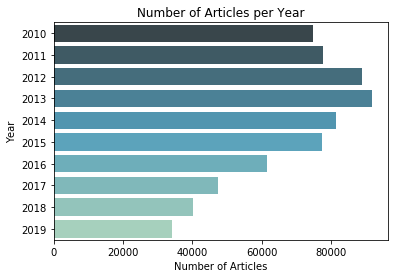

In [20]:
#Number of articles by year 
%matplotlib inline

with sns.color_palette("GnBu_d", 10):
    ax= sns.countplot(y="Year",data=reduced_data)
    ax.set(xlabel='Number of Articles', ylabel='Year')
plt.title("Number of Articles per Year")

Observation From the year 2010 till 2013, there was a rise in the number of articles. On the other side, 2014-2019 there was a steady decrease in the number.

Text(0.5, 1.0, 'Top 20 words in the news headlines between the year 2010 to 2019')

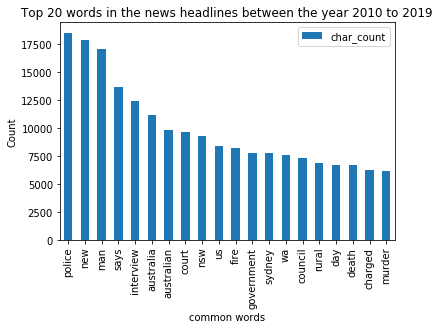

In [21]:
mapping.plot(kind='bar',x='Character',y='char_count')

plt.xlabel("common words") 

plt.ylabel('Count') 

plt.title('Top 20 words in the news headlines between the year 2010 to 2019')

Text(0.5, 1.0, 'Top 10 words in the news headlines between the year 2015 to 2019')

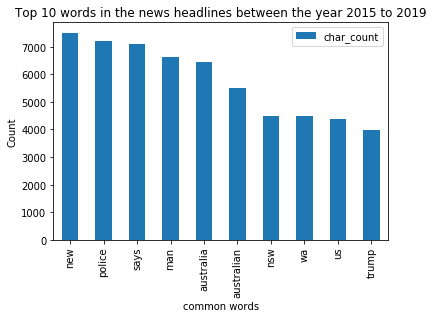

In [22]:
us_domination_mapping.plot(kind='bar',x='Character',y='char_count')

plt.xlabel("common words") 

plt.ylabel('Count') 

plt.title('Top 10 words in the news headlines between the year 2015 to 2019')

Text(0.5, 1.0, 'Top 10 words in the news headlines between the year 2010 to 2014')

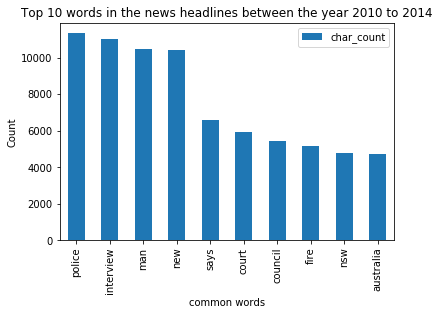

In [23]:
interview_mapping.plot(kind='bar',x='Character',y='char_count')

plt.xlabel("common words") 

plt.ylabel('Count') 

plt.title('Top 10 words in the news headlines between the year 2010 to 2014')

Observation It is clearly seen that the word 'interview' was the second top frequently used word during the year 2010 to 2014, whereas during the year 2015 to 2019, the word interview was not found in the top 10 list. Which means ABC has reduced the number of news relating to interview, conversation, debate and so on.

INSIGHTS

Common national conversation topics are identified as top news headlines over a certain period say for eg: Year 2011 has a unique word 'flood' which was a national conversation topic during that period.
Crime and its related words like police, man, death, murder, charged, court are considered to be a constant topic in national conversation
A news headline can be considered as a hot news, if it is dominating the current national conversation.
Reduce in the number of interviews may reduced the number of articles. 
ABC may identified australians loosing their interest towards interviews, which may be the reason for ABC to reduce interviews related headlines after 2014.

-------------------------------END OF NOTEBOOK---------------------------------------------------